## Final Project: The best neighborhood in Pittsburgh

Group name: WEJ

Group members:Weini Xie He, Ethan Guan, Jingtao Zhao 

## Introduction

We believe that the best neighborhood should be the most stable neighborhood, where people can get their basic needs met, feel safe in their surroundings, and have access to transportation. So, we looked at the data that shows the percentage of people with salaries, the crime data, and the traffic data in the neighborhood.

## The Metric

Percent of people with salaries in the neighborhood

I decided to look at the percent of people that have wages or salaries as one of the factors to determine the most stable neighborhood. This is an important factor because in order to be stable, people in the neighborhood should be able to obtain their basic needs for living, and a salary is money that people can use to buy their needs. 

In [26]:
#import panda
import pandas as pd
import numpy as np
%matplotlib inline

#open the salary data file
salary = pd.read_csv("salary.csv")
salary.head(5)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
0,Allegheny Center,1,870.0,93.000000,635.0,91.000000,235.0,59.000000
1,Allegheny West,2,146.0,36.000000,119.0,35.000000,27.0,20.000000
2,Allentown,3,1069.0,132.457540,736.0,140.335313,333.0,97.493590
3,Arlington,4,701.0,104.465305,570.0,106.273233,131.0,45.199558
4,Arlington Heights,5,144.0,59.000000,99.0,60.000000,45.0,30.000000


## Visualization

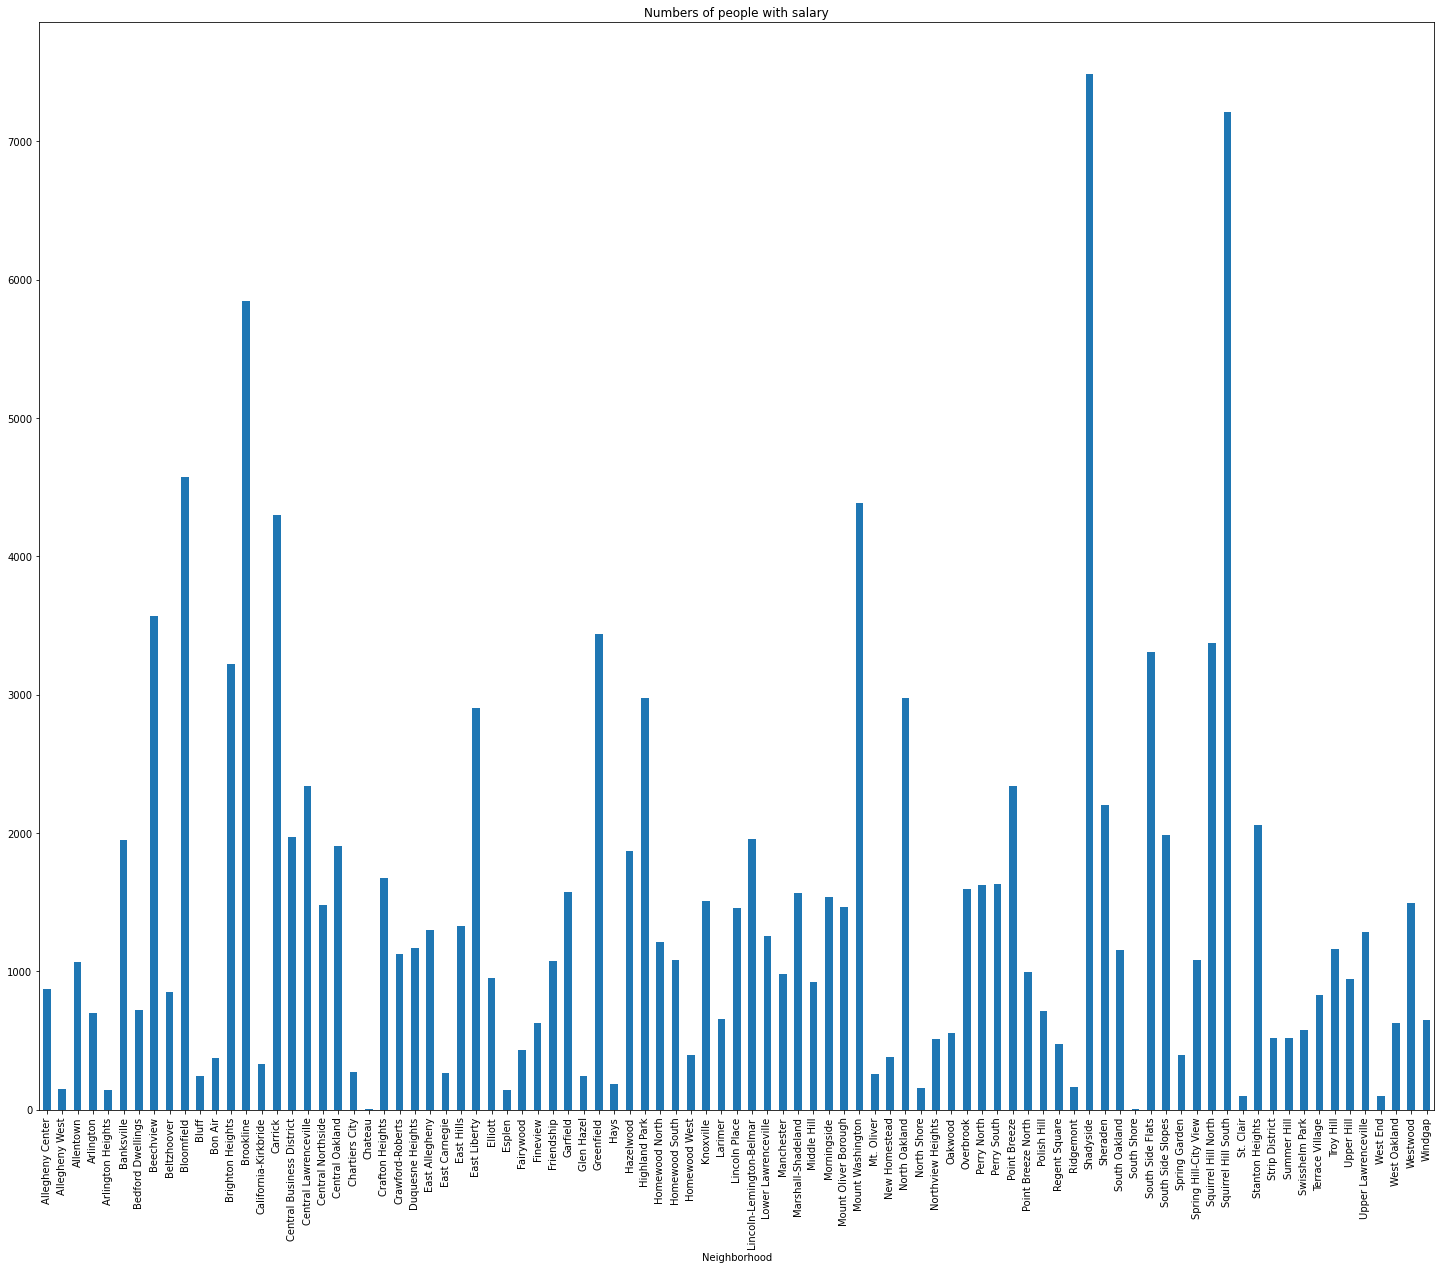

In [27]:
# make the index to neighborhood names
salary = salary.set_index('Neighborhood')
# create a bar visualization
salary['Estimate; Total:'].plot(kind="bar", title=("Numbers of people with salary"), figsize=(25,20))

In [28]:
#shows only the neighborhood name and the total number of people
salary = salary.iloc[0:, 0:3]
#show the neighborhood with the larget number of people with salary
salary.nlargest(5, 'Estimate; Total:',keep='first')

,Id,Estimate; Total:,Margin of Error; Total:
Neighborhood,,,
Shadyside,69,7484.0,360.919659
Squirrel Hill South,78,7211.0,332.601864
Brookline,14,5843.0,327.694980
Bloomfield,10,4571.0,205.494525
Mount Washington,54,4385.0,249.523546


But since the total population of each neighborhood is different, we should look at the percentage of each person with salary in the neighborhood for a more accurate list.

In [29]:
#open the total-population data file
population = pd.read_csv("total-population.csv")
#show the first 10 datas
population.head(5)

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
0,Allegheny Center,1,1411.0,196.000000
1,Allegheny West,2,343.0,96.000000
2,Allentown,3,2558.0,449.773276
3,Arlington,4,1852.0,348.188168
4,Arlington Heights,5,272.0,126.000000


## Visualization

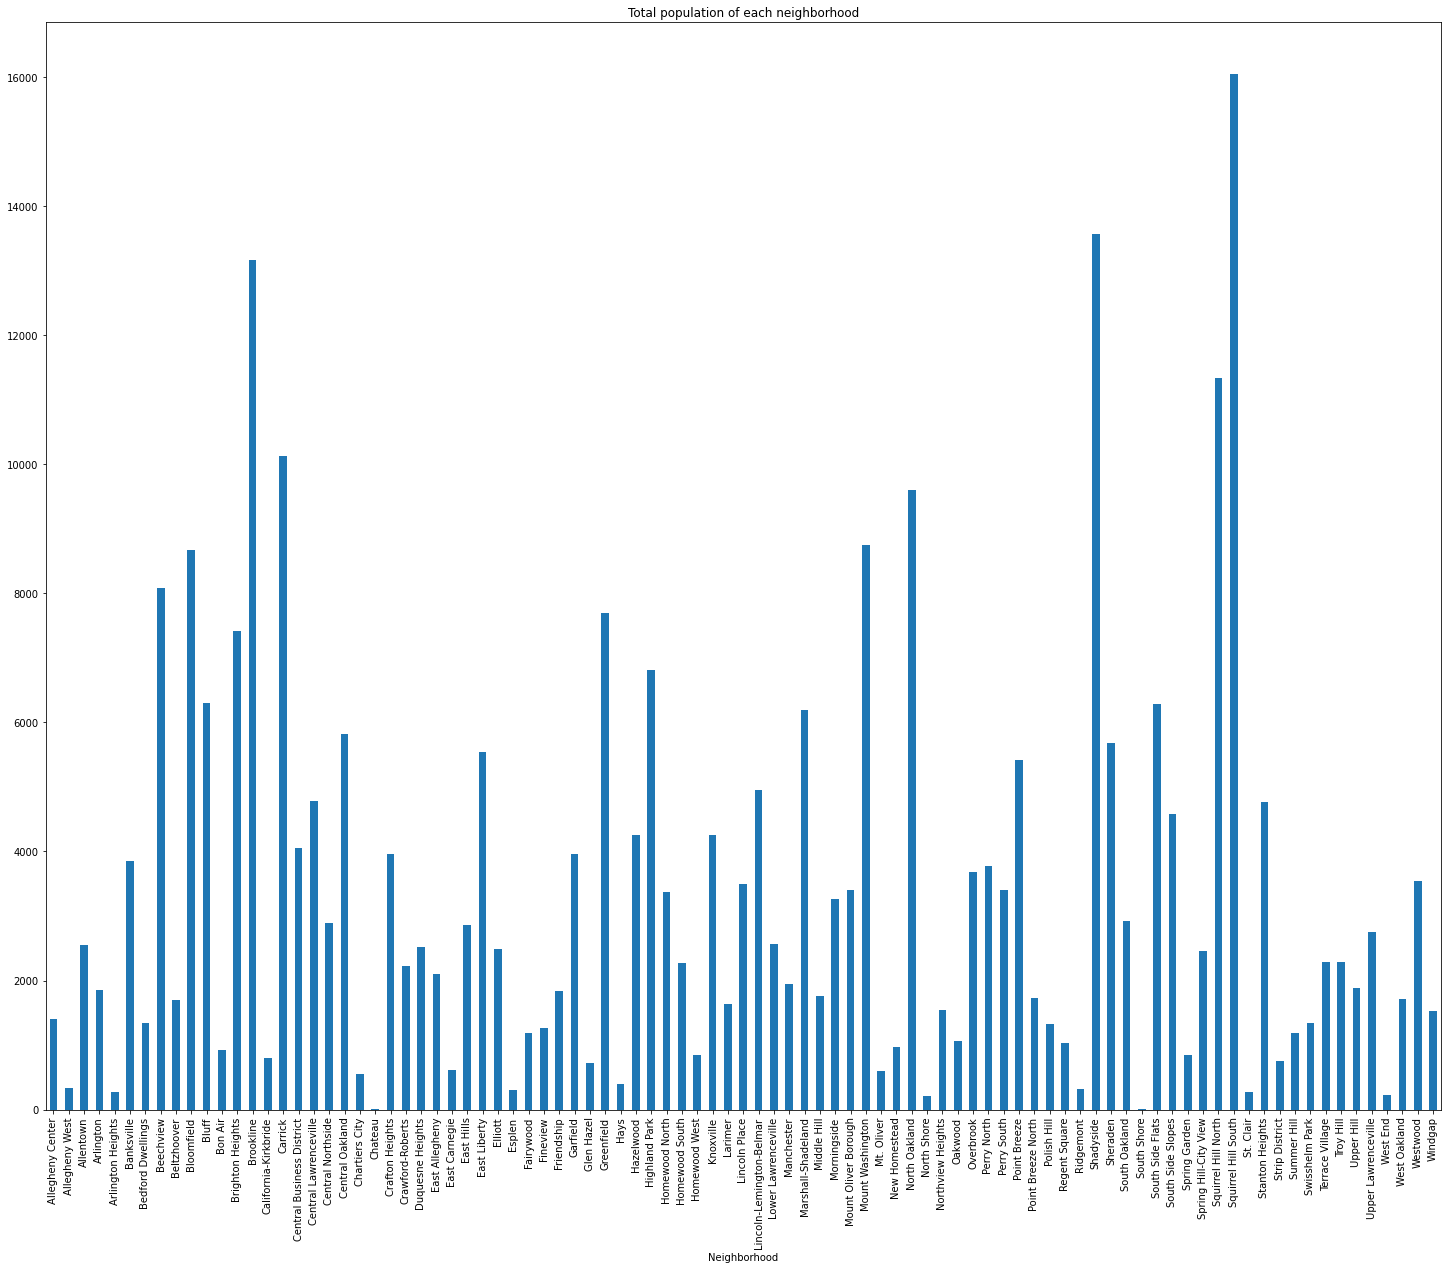

In [30]:
# make the index to neighborhood names
population = population.set_index('Neighborhood')
# create a bar visualization
population['Estimate; Total'].plot(kind="bar", title=("Total population of each neighborhood"), figsize=(25,20))

In [31]:
#shows only the neighborhood name and the total number of people
population = population.iloc[0:, 0:2]
#show the neighborhood with largest population
population.nlargest(10, 'Estimate; Total',keep='first')

,Id,Estimate; Total
Neighborhood,,
Squirrel Hill South,78,16042.0
Shadyside,69,13562.0
Brookline,14,13160.0
Squirrel Hill North,77,11336.0
Carrick,16,10122.0
North Oakland,57,9602.0
Mount Washington,54,8743.0
Bloomfield,10,8669.0
Beechview,8,8078.0


Now that we have both the neighborhood with numbers of people with salary data and the top 10 neighborhood with the largest population data, we can calculate the percentage of each person in the neighborhood with salary.

In [34]:
#calculate the percentage of each person with salary in the neighborhood
#create a new dataframe to store needed datas
percentage = pd.DataFrame()
#use the data from the salary data file and the data from the total population file
#create new columns
percentage['Number of people with salary']= salary['Estimate; Total:']
percentage['Total population']= population['Estimate; Total']
#calculate the percentage by dividing the total population by the number of people with salary 
percentage['Percent']= (percentage['Number of people with salary']/percentage['Total population'])*100
percentage.head(10)

,Number of people with salary,Total population,Percent
Neighborhood,,,
Allegheny Center,870.0,1411.0,61.658398
Allegheny West,146.0,343.0,42.565598
Allentown,1069.0,2558.0,41.790461
Arlington,701.0,1852.0,37.850972
Arlington Heights,144.0,272.0,52.941176
Banksville,1946.0,3858.0,50.440643
Bedford Dwellings,723.0,1349.0,53.595256
Beechview,3567.0,8078.0,44.156970
Beltzhoover,848.0,1702.0,49.823737


In [35]:
#show the neighborhood with the larget percent of each person with salary
percentage.nlargest(10, 'Percent',keep='first')

,Number of people with salary,Total population,Percent
Neighborhood,,,
Chateau,3.0,3.0,100.000000
North Shore,154.0,205.0,75.121951
Strip District,520.0,747.0,69.611780
South Shore,8.0,12.0,66.666667
East Allegheny,1302.0,2095.0,62.147971
Allegheny Center,870.0,1411.0,61.658398
Friendship,1074.0,1840.0,58.369565
Point Breeze North,996.0,1732.0,57.505774
Shadyside,7484.0,13562.0,55.183601


## Top neighborhoods with the largest percentage 
As you can see the top 10 neighborhoods with the highest percent of person with salary are Chateau, North Shore, Strip District, South Shore, East Alleghney, Allegheny Center, Friendship, Point Breeze North, Shadyside, and Bedford Dwellings.